In [13]:
import pandas as pd

from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split 
from sklearn.metrics import confusion_matrix
from sklearn.metrics import  classification_report
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier

from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from sklearn.naive_bayes import MultinomialNB, GaussianNB

import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

import matplotlib.pyplot as plt
import numpy as np
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

from sklearn.model_selection import GridSearchCV




In [14]:
df = pd.read_csv("final.csv")


# Classification User

In [15]:
feature_cols_users = ['followers_count', 'favourites_count','friends_count',
       'statuses_count', 'listed_count', 'cred','BotScore',
       'normalize_influence']

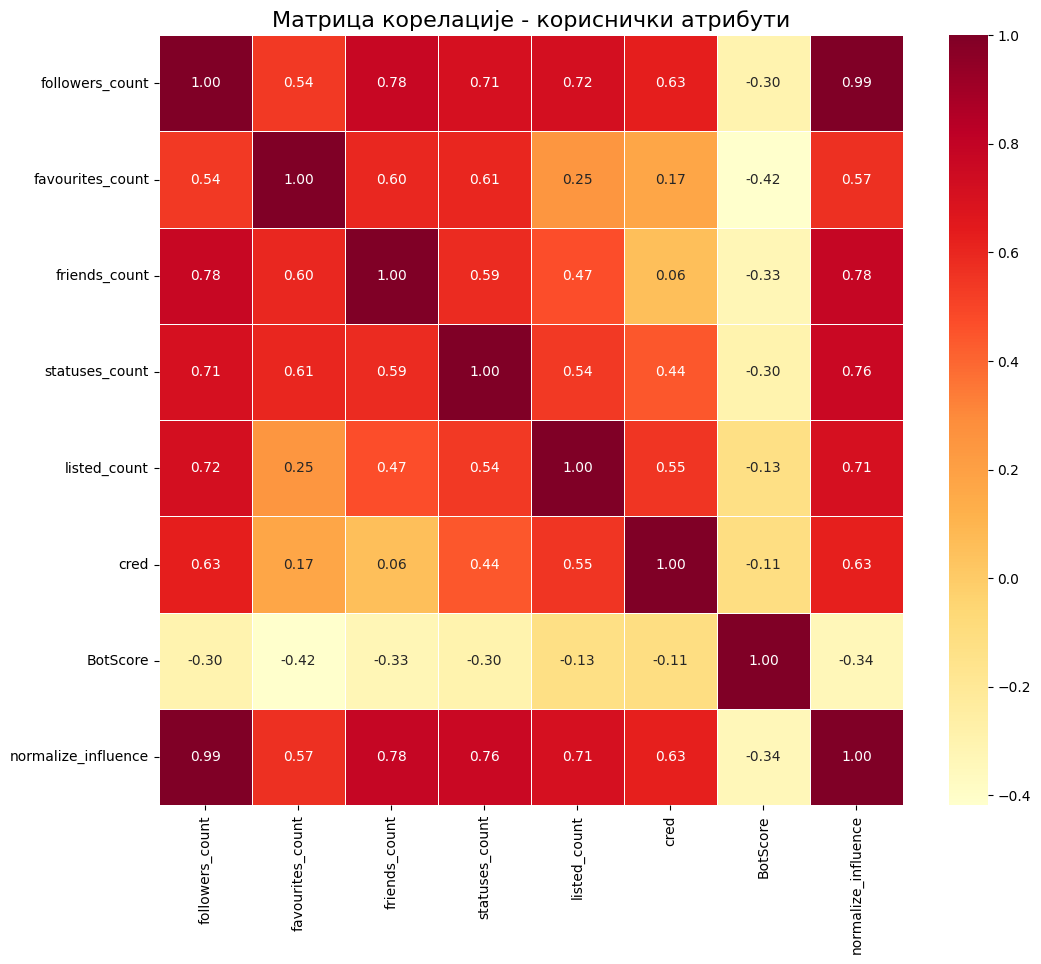

In [5]:
correlation_matrix = df[feature_cols_users].corr()

plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='YlOrRd', fmt=".2f", linewidths=.5)
plt.title('Матрица корелације - кориснички атрибути', fontsize=16)
plt.show()

In [16]:
# Priprema podataka
x = df[feature_cols_users]
y = df['BinaryNumTarget']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=1)

In [17]:
#Random Forest - User

rf = RandomForestClassifier(random_state=42)


param_grid = {
    'n_estimators': [100, 150],
    'max_depth': [10, 20, None],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2],
    'criterion': ['gini', 'entropy']
}


grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, 
                           cv=3, scoring='accuracy', verbose=1, n_jobs=-1)

grid_search.fit(x_train, y_train)
best_rf = grid_search.best_estimator_
y_pred = best_rf.predict(x_test)

print("Najbolji parametri:", grid_search.best_params_)
cm = confusion_matrix(y_test, y_pred)

cm_rounded = np.round(cm, 3)

print("Confusion Matrix:")
print(cm_rounded)


Fitting 3 folds for each of 48 candidates, totalling 144 fits
Najbolji parametri: {'criterion': 'gini', 'max_depth': 20, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}
Confusion Matrix:
[[9130 3860]
 [5365 8484]]


In [18]:
from sklearn.metrics import classification_report

report = classification_report(y_test, y_pred, digits=3)
print(report)


              precision    recall  f1-score   support

         0.0      0.630     0.703     0.664     12990
         1.0      0.687     0.613     0.648     13849

    accuracy                          0.656     26839
   macro avg      0.659     0.658     0.656     26839
weighted avg      0.660     0.656     0.656     26839



In [19]:

#Decision Tree - User

clf = DecisionTreeClassifier()


param_grid = {
    'max_depth': [5, 10, 15, 20, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'criterion': ['gini', 'entropy']
}
grid_search = GridSearchCV(estimator=clf, param_grid=param_grid, 
                           cv=5, scoring='accuracy', verbose=1, n_jobs=-1)


grid_search.fit(x_train, y_train)
best_clf = grid_search.best_estimator_
y_pred = best_clf.predict(x_test)


print("Najbolji parametri:", grid_search.best_params_)
report = classification_report(y_test, y_pred, digits=3)
print(report)


Fitting 5 folds for each of 90 candidates, totalling 450 fits
Najbolji parametri: {'criterion': 'entropy', 'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2}
              precision    recall  f1-score   support

         0.0      0.621     0.614     0.618     12990
         1.0      0.642     0.649     0.645     13849

    accuracy                          0.632     26839
   macro avg      0.632     0.631     0.632     26839
weighted avg      0.632     0.632     0.632     26839



In [20]:
# Naive Bayes - User
from sklearn.metrics import accuracy_score, confusion_matrix
nb = GaussianNB()

nb.fit(x_train, y_train)

y_pred = nb.predict(x_test)


report = classification_report(y_test, y_pred, digits=3)
print(report)

              precision    recall  f1-score   support

         0.0      0.538     0.612     0.572     12990
         1.0      0.582     0.507     0.542     13849

    accuracy                          0.558     26839
   macro avg      0.560     0.559     0.557     26839
weighted avg      0.560     0.558     0.556     26839



In [21]:
# Logistic Regression - User

param_grid = {'C': [0.1, 1, 10, 100]}
grid_search = GridSearchCV(LogisticRegression(), param_grid, cv=3, scoring='f1')
grid_search.fit(x_train, y_train)

print("Best hyperparameters from GridSearchCV:", grid_search.best_params_)

lr = LogisticRegression(class_weight='balanced', penalty='l1', solver='liblinear', C=grid_search.best_params_['C'])

lr.fit(x_train, y_train)
y_pred = lr.predict(x_test)

print("Najbolji parametri:", grid_search.best_params_)
report = classification_report(y_test, y_pred, digits=3)
print(report)



Best hyperparameters from GridSearchCV: {'C': 0.1}
Najbolji parametri: {'C': 0.1}
              precision    recall  f1-score   support

         0.0      0.543     0.670     0.600     12990
         1.0      0.603     0.470     0.528     13849

    accuracy                          0.567     26839
   macro avg      0.573     0.570     0.564     26839
weighted avg      0.574     0.567     0.563     26839



In [23]:
# KNN User

param_grid_knn = {
    'n_neighbors': [3, 5, 7, 10],
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan']
}

grid_search_knn = GridSearchCV(KNeighborsClassifier(), param_grid_knn, cv=5, scoring='f1', n_jobs=-1)
grid_search_knn.fit(x_train, y_train)

print("Best parameters for KNN:", grid_search_knn.best_params_)

best_knn = grid_search_knn.best_estimator_
y_pred_knn = best_knn.predict(x_test)

report = classification_report(y_test, y_pred_knn, digits=3)
print(report)



Best parameters for KNN: {'metric': 'euclidean', 'n_neighbors': 10, 'weights': 'distance'}
              precision    recall  f1-score   support

         0.0      0.634     0.636     0.635     12990
         1.0      0.658     0.656     0.657     13849

    accuracy                          0.646     26839
   macro avg      0.646     0.646     0.646     26839
weighted avg      0.646     0.646     0.646     26839



In [24]:
#XGBoost - User

param_grid_xgb = {
    'learning_rate': [0.01, 0.1, 0.2],  
    'n_estimators': [100, 200],        
    'max_depth': [3, 5, 7],             
    'subsample': [0.8, 0.9, 1.0],        
    #'colsample_bytree': [0.8, 0.9]       
}
grid_search_xgb = GridSearchCV(XGBClassifier(), param_grid_xgb, cv=3, scoring='f1', n_jobs=-1)
grid_search_xgb.fit(x_train, y_train)

print("Best parameters for XGBoost:", grid_search_xgb.best_params_)

best_xgb = grid_search_xgb.best_estimator_
y_pred_xgb = best_xgb.predict(x_test)

report = classification_report(y_test, y_pred_xgb, digits=3)
print(report)

Best parameters for XGBoost: {'learning_rate': 0.2, 'max_depth': 7, 'n_estimators': 200, 'subsample': 1.0}
              precision    recall  f1-score   support

         0.0      0.607     0.655     0.630     12990
         1.0      0.650     0.602     0.626     13849

    accuracy                          0.628     26839
   macro avg      0.629     0.629     0.628     26839
weighted avg      0.629     0.628     0.628     26839



In [25]:
#SVM - User

svm_clf = SVC()  
svm_clf.fit(x_train, y_train)  

y_pred = svm_clf.predict(x_test)


report = classification_report(y_test, y_pred, digits=3)
print(report)

              precision    recall  f1-score   support

         0.0      0.549     0.702     0.616     12990
         1.0      0.621     0.458     0.528     13849

    accuracy                          0.576     26839
   macro avg      0.585     0.580     0.572     26839
weighted avg      0.586     0.576     0.570     26839



# Classification - Tweet Feature

In [26]:
feature_cols_tweet = [
        'Word count',
       'Max word length', 'Min word length', 'Average word length',
       'Present verbs', 'Past verbs', 'Adjectives', 'Adverbs', 'Pronouns',
        'Determiners', 'Prepositions', 'Digits'
]

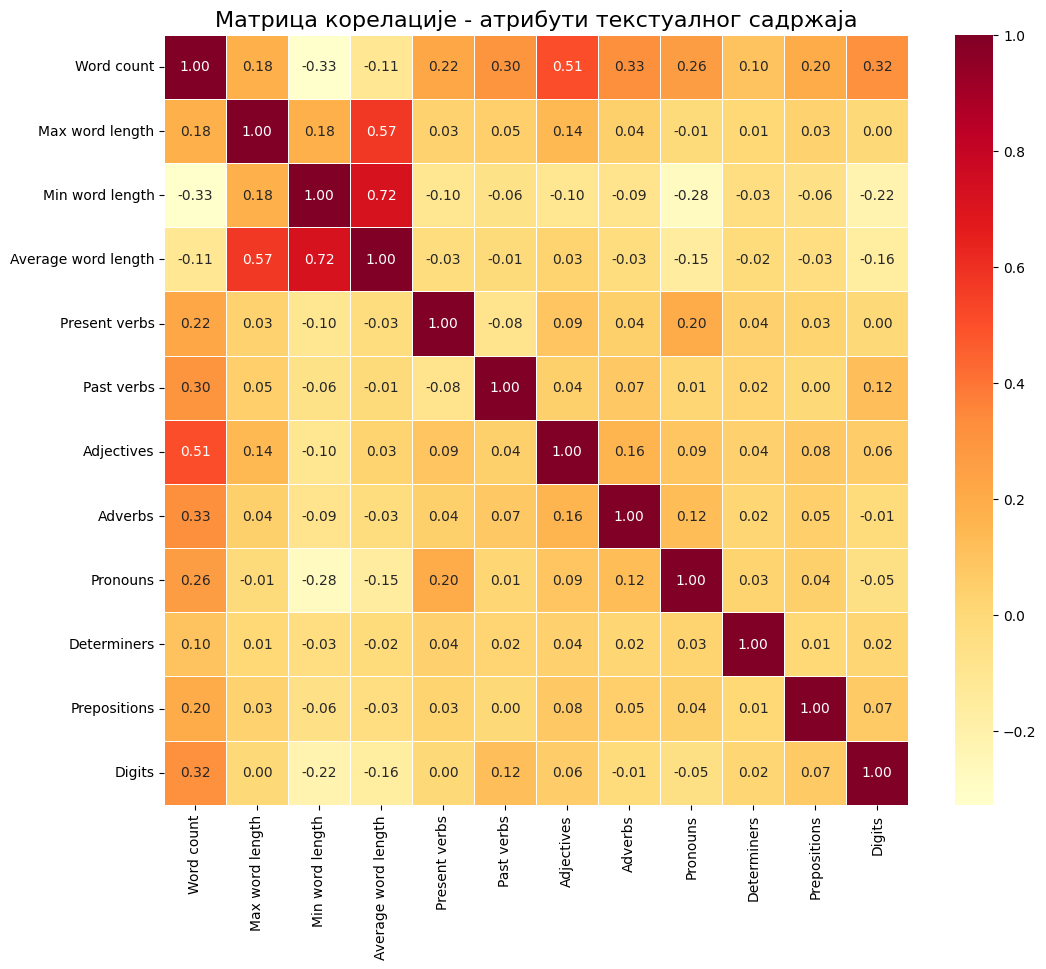

In [7]:
correlation_matrix = df[feature_cols_tweet].corr()

plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='YlOrRd', fmt=".2f", linewidths=.5)
plt.title('Матрица корелације - атрибути текстуалног садржаја', fontsize=16)
plt.show()

In [27]:
x = df[feature_cols_tweet]
y = df['BinaryNumTarget']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=1) 


In [20]:

model = RandomForestClassifier()
model.fit(x_train, y_train)
importances = model.feature_importances_


In [21]:

feature_importance_df = pd.DataFrame({
    'Feature': x_train.columns,
    'Importance': importances
})

feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

print(feature_importance_df)

                Feature  Importance
3   Average word length    0.285542
0            Word count    0.171371
1       Max word length    0.115871
6            Adjectives    0.090894
7               Adverbs    0.069780
2       Min word length    0.053629
5            Past verbs    0.051439
4         Present verbs    0.048193
11               Digits    0.043083
8              Pronouns    0.034256
10         Prepositions    0.021874
9           Determiners    0.014068


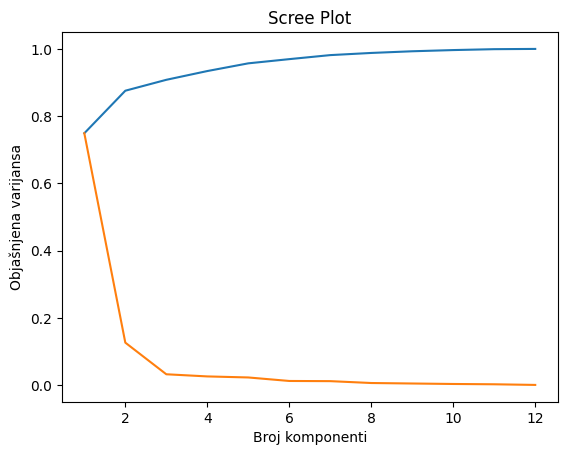

Broj komponenti za 95% varijanse: 5


In [ ]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt


pca = PCA()
pca.fit(x_train)

explained_variance_ratio = pca.explained_variance_ratio_
cumulative_variance = explained_variance_ratio.cumsum()


plt.plot(range(1, len(cumulative_variance) + 1), cumulative_variance)
plt.xlabel('Broj komponenti')
plt.ylabel('Kumulativni procenat varijanse')
plt.title('PCA - Kumulativna varijansa')
plt.plot(range(1, len(explained_variance_ratio) + 1), explained_variance_ratio)
plt.xlabel('Broj komponenti')
plt.ylabel('Objašnjena varijansa')
plt.title('Scree Plot')
plt.show()

plt.show()

n_components_95 = (cumulative_variance >= 0.95).argmax() + 1
print(f"Broj komponenti za 95% varijanse: {n_components_95}")


In [28]:
# Random Forest - Tweet


rf = RandomForestClassifier(random_state=42)


param_grid = {
    'n_estimators': [100, 150],
    'max_depth': [10, 20, None],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2],
    'criterion': ['gini', 'entropy']
}


grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, 
                           cv=3, scoring='accuracy', verbose=1, n_jobs=-1)

grid_search.fit(x_train, y_train)
best_rf = grid_search.best_estimator_
y_pred = best_rf.predict(x_test)

report = classification_report(y_test, y_pred, digits=3)
print(report)


Fitting 3 folds for each of 48 candidates, totalling 144 fits
              precision    recall  f1-score   support

         0.0      0.628     0.651     0.639     12990
         1.0      0.661     0.638     0.649     13849

    accuracy                          0.644     26839
   macro avg      0.645     0.645     0.644     26839
weighted avg      0.645     0.644     0.645     26839



In [29]:
# Decision Tree - Tweet
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix



clf = DecisionTreeClassifier()

param_grid = {
    'max_depth': [5, 10, 15, 20, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'criterion': ['gini', 'entropy']
}

grid_search = GridSearchCV(estimator=clf, param_grid=param_grid, 
                           cv=5, scoring='accuracy', verbose=1, n_jobs=-1)


grid_search.fit(x_train, y_train)
best_clf = grid_search.best_estimator_
y_pred = best_clf.predict(x_test)


report = classification_report(y_test, y_pred, digits=3)
print(report)

Fitting 5 folds for each of 90 candidates, totalling 450 fits
              precision    recall  f1-score   support

         0.0      0.585     0.641     0.612     12990
         1.0      0.630     0.574     0.601     13849

    accuracy                          0.606     26839
   macro avg      0.608     0.607     0.606     26839
weighted avg      0.608     0.606     0.606     26839



In [30]:
# Naive Bayes -  Tweet

nb = MultinomialNB()


param_grid = {
    'alpha': [0.01, 0.1, 0.5, 1.0, 2.0, 5.0],        
    'fit_prior': [True, False],                      
}

grid_search = GridSearchCV(estimator=nb, param_grid=param_grid, 
                           cv=5, scoring='accuracy', verbose=1, n_jobs=-1)

grid_search.fit(x_train, y_train)

best_nb = grid_search.best_estimator_
y_pred = best_nb.predict(x_test)

report = classification_report(y_test, y_pred, digits=3)
print(report)


Fitting 5 folds for each of 12 candidates, totalling 60 fits
              precision    recall  f1-score   support

         0.0      0.561     0.576     0.568     12990
         1.0      0.592     0.577     0.584     13849

    accuracy                          0.576     26839
   macro avg      0.576     0.576     0.576     26839
weighted avg      0.577     0.576     0.576     26839



In [31]:
# Logistic Regression - Tweet

lr = LogisticRegression(max_iter=1000)  
lr.fit(x_train, y_train)

y_pred = lr.predict(x_test)


report = classification_report(y_test, y_pred, digits=3)
print(report)

              precision    recall  f1-score   support

         0.0      0.571     0.517     0.543     12990
         1.0      0.584     0.636     0.609     13849

    accuracy                          0.578     26839
   macro avg      0.578     0.577     0.576     26839
weighted avg      0.578     0.578     0.577     26839



In [32]:
#KNeighbors - Tweet


param_grid_knn = {
    'n_neighbors': [3, 5, 7, 10],
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan']
}

grid_search_knn = GridSearchCV(KNeighborsClassifier(), param_grid_knn, cv=5, scoring='f1', n_jobs=-1)
grid_search_knn.fit(x_train, y_train)

print("Best parameters for KNN:", grid_search_knn.best_params_)

best_knn = grid_search_knn.best_estimator_
y_pred_knn = best_knn.predict(x_test)

report = classification_report(y_test, y_pred_knn, digits=3)
print(report)


Best parameters for KNN: {'metric': 'euclidean', 'n_neighbors': 10, 'weights': 'distance'}
              precision    recall  f1-score   support

         0.0      0.594     0.614     0.604     12990
         1.0      0.626     0.607     0.616     13849

    accuracy                          0.610     26839
   macro avg      0.610     0.610     0.610     26839
weighted avg      0.611     0.610     0.610     26839



In [33]:
#XGBoost - Tweet

param_grid_xgb = {
    'learning_rate': [0.01, 0.1, 0.2],  
    'n_estimators': [100, 200],        
    'max_depth': [3, 5, 7],             
    'subsample': [0.8, 0.9, 1.0],        
    #'colsample_bytree': [0.8, 0.9]       
}
grid_search_xgb = GridSearchCV(XGBClassifier(), param_grid_xgb, cv=3, scoring='f1', n_jobs=-1)
grid_search_xgb.fit(x_train, y_train)

print("Best parameters for XGBoost:", grid_search_xgb.best_params_)

best_xgb = grid_search_xgb.best_estimator_
y_pred_xgb = best_xgb.predict(x_test)

report = classification_report(y_test, y_pred_xgb, digits=3)
print(report)

Best parameters for XGBoost: {'learning_rate': 0.1, 'max_depth': 7, 'n_estimators': 200, 'subsample': 1.0}
              precision    recall  f1-score   support

         0.0      0.613     0.643     0.628     12990
         1.0      0.649     0.620     0.634     13849

    accuracy                          0.631     26839
   macro avg      0.631     0.632     0.631     26839
weighted avg      0.632     0.631     0.631     26839



In [34]:
# SVM - Tweet

svm_clf = SVC()  
svm_clf.fit(x_train, y_train)  

y_pred = svm_clf.predict(x_test)

report = classification_report(y_test, y_pred, digits=3)
print(report)


              precision    recall  f1-score   support

         0.0      0.579     0.578     0.579     12990
         1.0      0.605     0.606     0.606     13849

    accuracy                          0.593     26839
   macro avg      0.592     0.592     0.592     26839
weighted avg      0.593     0.593     0.593     26839



In [ ]:
random_predictions = np.random.randint(0, 2, size=len(y_test)) 


print("=== Random Baseline Model ===")
print("Accuracy:", accuracy_score(y_test, random_predictions))
print("Precision:", precision_score(y_test, random_predictions, zero_division=1))
print("Recall:", recall_score(y_test, random_predictions, zero_division=1))
print("f1:", f1_score(y_test, random_predictions, zero_division=1))
print(classification_report(y_test, random_predictions))

=== Random Baseline Model ===
Accuracy: 0.503260181079772
Precision: 0.5190958114796483
Recall: 0.5074012564084049
f1: 0.5131819177682028
              precision    recall  f1-score   support

         0.0       0.49      0.50      0.49     12990
         1.0       0.52      0.51      0.51     13849

    accuracy                           0.50     26839
   macro avg       0.50      0.50      0.50     26839
weighted avg       0.50      0.50      0.50     26839



# Empath

In [35]:
df_empath = pd.read_csv("final_merged.csv")

In [48]:
df.shape

(134195, 37)

In [73]:
df_empath.shape

(134195, 233)

In [36]:
# Grupa 1: Pozitivne emocije
positive_emotions = [
    'cheerfulness', 'joy', 'contentment', 'love', 'warmth',
    'positive_emotion', 'fun', 'giving', 'friends'
]

# Grupa 2: Negativne emocije
negative_emotions = [
    'sadness', 'disgust', 'suffering', 'negative_emotion',
    'weakness', 'neglect'
]

# Grupa 3: Socijalne emocije
social_emotions = [
    'pride', 'shame', 'politeness', 'affection', 'leader',
    'dominant_personality', 'childish', 'trust', 'sympathy'
]

# Grupa 4: Intenzivne emocije
intense_emotions = [
    'surprise', 'rage', 'horror', 'fear', 'exasperation',
    'nervousness', 'irritability', 'torment', 'pain', 'hate', 'anger'
]

# Grupa 5: Kognitivno-emotivne emocije
cognitive_emotions = [
    'anticipation', 'confusion', 'envy', 'disappointment',
    'optimism', 'zest', 'achievement'
]

# Kreiranje novih kolona kao zbir postojećih
df_empath['emotion_positive'] = df_empath[[f'empath_result.{x}' for x in positive_emotions]].sum(axis=1)
df_empath['emotion_negative'] = df_empath[[f'empath_result.{x}' for x in negative_emotions]].sum(axis=1)
df_empath['emotion_social']   = df_empath[[f'empath_result.{x}' for x in social_emotions]].sum(axis=1)
df_empath['emotion_intense']  = df_empath[[f'empath_result.{x}' for x in intense_emotions]].sum(axis=1)
df_empath['emotion_cognitive'] = df_empath[[f'empath_result.{x}' for x in cognitive_emotions]].sum(axis=1)


In [51]:
df_empath.columns

Index(['Unnamed: 0.2', 'Unnamed: 0.1', 'Unnamed: 0', 'majority_target',
       'statement', 'BinaryNumTarget', 'tweet', 'followers_count',
       'friends_count', 'favourites_count',
       ...
       'empath_result.contentment', 'empath_result.writing',
       'empath_result.rural', 'empath_result.positive_emotion',
       'empath_result.musical', 'emotion_positive', 'emotion_negative',
       'emotion_social', 'emotion_intense', 'emotion_cognitive'],
      dtype='object', length=238)

In [37]:
kolone = ['emotion_positive', 'emotion_negative',
       'emotion_social', 'emotion_intense', 'emotion_cognitive']

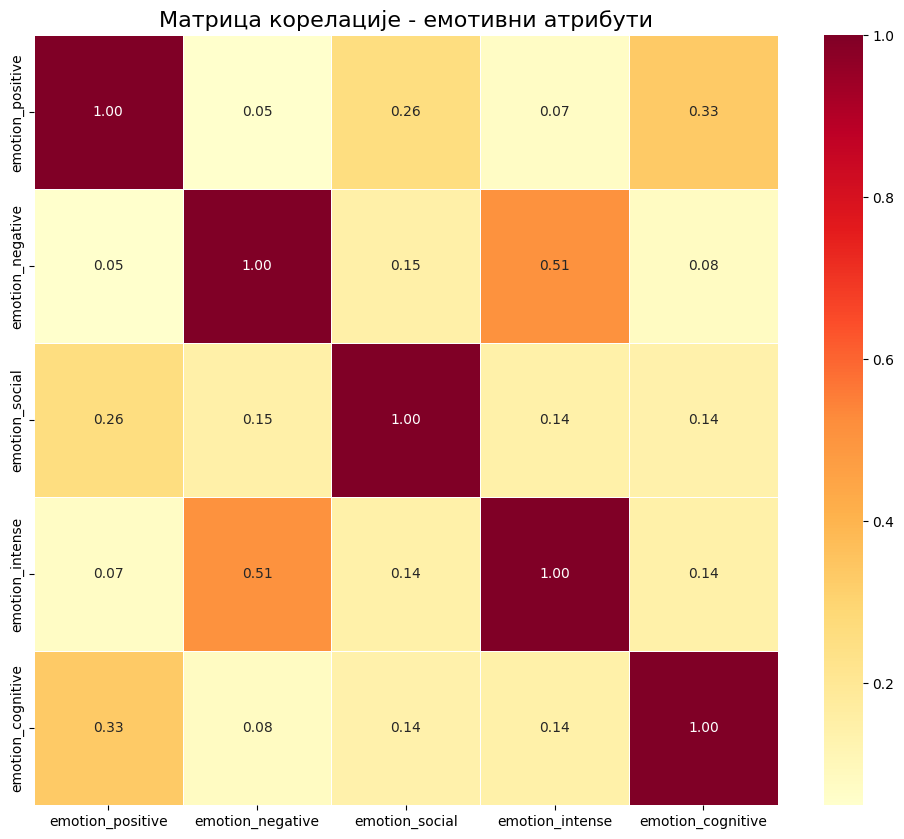

In [91]:
correlation_matrix = df_empath[kolone].corr()

plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='YlOrRd', fmt=".2f", linewidths=.5)
plt.title('Матрица корелације - емотивни атрибути', fontsize=16)
plt.show()

In [38]:
x = df_empath[kolone]
y = df_empath['BinaryNumTarget']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=1) 

In [39]:
# Random Forest - Empath
rf = RandomForestClassifier(random_state=42)


param_grid = {
    'n_estimators': [100, 150],
    'max_depth': [10, 20, None],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2],
    'criterion': ['gini', 'entropy']
}


grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, 
                           cv=3, scoring='accuracy', verbose=1, n_jobs=-1)

grid_search.fit(x_train, y_train)
best_rf = grid_search.best_estimator_
y_pred = best_rf.predict(x_test)

report = classification_report(y_test, y_pred, digits=3)
print(report)

Fitting 3 folds for each of 48 candidates, totalling 144 fits
              precision    recall  f1-score   support

         0.0      0.559     0.488     0.521     12990
         1.0      0.571     0.638     0.603     13849

    accuracy                          0.566     26839
   macro avg      0.565     0.563     0.562     26839
weighted avg      0.565     0.566     0.563     26839



In [57]:
best_model = grid_search.best_estimator_
importances = best_model.feature_importances_

for importance, name in sorted(zip(importances, x_train.columns), reverse=True):
    print(f"{name}: {importance:.4f}")


emotion_negative: 0.2638
emotion_social: 0.2605
emotion_positive: 0.1777
emotion_intense: 0.1533
emotion_cognitive: 0.1447


In [40]:
# Decision Tree - Empath

clf = DecisionTreeClassifier()

param_grid = {
    'max_depth': [5, 10, 15, 20, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'criterion': ['gini', 'entropy']
}

grid_search = GridSearchCV(estimator=clf, param_grid=param_grid, 
                           cv=5, scoring='accuracy', verbose=1, n_jobs=-1)


grid_search.fit(x_train, y_train)
best_clf = grid_search.best_estimator_
y_pred = best_clf.predict(x_test)


print("Najbolji parametri:", grid_search.best_params_)
report = classification_report(y_test, y_pred, digits=3)
print(report)


Fitting 5 folds for each of 90 candidates, totalling 450 fits
Najbolji parametri: {'criterion': 'entropy', 'max_depth': 10, 'min_samples_leaf': 4, 'min_samples_split': 2}
              precision    recall  f1-score   support

         0.0      0.563     0.432     0.489     12990
         1.0      0.563     0.686     0.618     13849

    accuracy                          0.563     26839
   macro avg      0.563     0.559     0.554     26839
weighted avg      0.563     0.563     0.556     26839



In [42]:
# Naive Bayes -  Empath

nb = GaussianNB()

nb.fit(x_train, y_train)

y_pred = nb.predict(x_test)


report = classification_report(y_test, y_pred, digits=3)
print(report)

              precision    recall  f1-score   support

         0.0      0.551     0.295     0.384     12990
         1.0      0.539     0.774     0.636     13849

    accuracy                          0.542     26839
   macro avg      0.545     0.535     0.510     26839
weighted avg      0.545     0.542     0.514     26839



In [43]:
# Logistic Regression - Empath

param_grid = {'C': [0.1, 1, 10, 100]}
grid_search = GridSearchCV(LogisticRegression(), param_grid, cv=3, scoring='accuracy')
grid_search.fit(x_train, y_train)

print("Best hyperparameters from GridSearchCV:", grid_search.best_params_)

lr = LogisticRegression(class_weight='balanced', penalty='l1', solver='liblinear', C=grid_search.best_params_['C'])

lr.fit(x_train, y_train)
y_pred = lr.predict(x_test)

report = classification_report(y_test, y_pred, digits=3)
print(report)


Best hyperparameters from GridSearchCV: {'C': 1}
              precision    recall  f1-score   support

         0.0      0.542     0.452     0.493     12990
         1.0      0.555     0.642     0.595     13849

    accuracy                          0.550     26839
   macro avg      0.549     0.547     0.544     26839
weighted avg      0.549     0.550     0.546     26839



In [44]:
#KNeighbors - Empath


param_grid_knn = {
    'n_neighbors': [3, 5, 7, 10],
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan']
}

grid_search_knn = GridSearchCV(KNeighborsClassifier(), param_grid_knn, cv=3, scoring='accuracy', n_jobs=-1)
grid_search_knn.fit(x_train, y_train)

print("Best parameters for KNN:", grid_search_knn.best_params_)

best_knn = grid_search_knn.best_estimator_
y_pred_knn = best_knn.predict(x_test)

report = classification_report(y_test, y_pred_knn, digits=3)
print(report)



Best parameters for KNN: {'metric': 'euclidean', 'n_neighbors': 7, 'weights': 'uniform'}
              precision    recall  f1-score   support

         0.0      0.546     0.406     0.466     12990
         1.0      0.551     0.684     0.610     13849

    accuracy                          0.549     26839
   macro avg      0.549     0.545     0.538     26839
weighted avg      0.549     0.549     0.540     26839



In [45]:
#XGBoost - Empath

param_grid_xgb = {
    'learning_rate': [0.01, 0.1, 0.2],  
    'n_estimators': [100, 200],        
    'max_depth': [3, 5, 7],             
    'subsample': [0.8, 0.9, 1.0],        
    'colsample_bytree': [0.8, 0.9]       
}
grid_search_xgb = GridSearchCV(XGBClassifier(), param_grid_xgb, cv=3, scoring='accuracy', n_jobs=-1)
grid_search_xgb.fit(x_train, y_train)

print("Best parameters for XGBoost:", grid_search_xgb.best_params_)

best_xgb = grid_search_xgb.best_estimator_
y_pred = best_xgb.predict(x_test)

report = classification_report(y_test, y_pred, digits=3)
print(report)


Best parameters for XGBoost: {'colsample_bytree': 0.8, 'learning_rate': 0.1, 'max_depth': 7, 'n_estimators': 100, 'subsample': 0.9}
              precision    recall  f1-score   support

         0.0      0.563     0.457     0.505     12990
         1.0      0.567     0.667     0.613     13849

    accuracy                          0.565     26839
   macro avg      0.565     0.562     0.559     26839
weighted avg      0.565     0.565     0.561     26839



In [46]:
# SVM - Empath

svm_clf = SVC()  
svm_clf.fit(x_train, y_train)  

y_pred = svm_clf.predict(x_test)

report = classification_report(y_test, y_pred, digits=3)
print(report)


              precision    recall  f1-score   support

         0.0      0.540     0.537     0.538     12990
         1.0      0.568     0.571     0.569     13849

    accuracy                          0.554     26839
   macro avg      0.554     0.554     0.554     26839
weighted avg      0.554     0.554     0.554     26839



# User + Tweet

In [47]:
features_cols_user_tweet = feature_cols_tweet+feature_cols_users

In [48]:
x = df[features_cols_user_tweet]
y = df['BinaryNumTarget']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=1) 


In [49]:
# Random Forest - User and Tweet
rf = RandomForestClassifier(random_state=42)


param_grid = {
    'n_estimators': [100, 150],
    'max_depth': [10, 20, None],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2],
    'criterion': ['gini', 'entropy']
}


grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, 
                           cv=3, scoring='accuracy', verbose=1, n_jobs=-1)

grid_search.fit(x_train, y_train)
best_rf = grid_search.best_estimator_
y_pred = best_rf.predict(x_test)

print("Najbolji parametri:", grid_search.best_params_)
report = classification_report(y_test, y_pred, digits=3)
print(report)


Fitting 3 folds for each of 48 candidates, totalling 144 fits
Najbolji parametri: {'criterion': 'entropy', 'max_depth': None, 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 150}
              precision    recall  f1-score   support

         0.0      0.659     0.679     0.669     12990
         1.0      0.690     0.671     0.680     13849

    accuracy                          0.675     26839
   macro avg      0.675     0.675     0.675     26839
weighted avg      0.675     0.675     0.675     26839



In [50]:
# Decision Tree - User and Tweet

clf = DecisionTreeClassifier()

param_grid = {
    'max_depth': [5, 10, 15, 20, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'criterion': ['gini', 'entropy']
}

grid_search = GridSearchCV(estimator=clf, param_grid=param_grid, 
                           cv=5, scoring='accuracy', verbose=1, n_jobs=-1)


grid_search.fit(x_train, y_train)
best_clf = grid_search.best_estimator_
y_pred = best_clf.predict(x_test)


print("Najbolji parametri:", grid_search.best_params_)
report = classification_report(y_test, y_pred, digits=3)
print(report)




Fitting 5 folds for each of 90 candidates, totalling 450 fits
Najbolji parametri: {'criterion': 'gini', 'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 5}
              precision    recall  f1-score   support

         0.0      0.592     0.692     0.638     12990
         1.0      0.657     0.553     0.600     13849

    accuracy                          0.620     26839
   macro avg      0.624     0.622     0.619     26839
weighted avg      0.625     0.620     0.619     26839



In [51]:
# Naive Bayes -  User and Tweet

nb = MultinomialNB()


param_grid = {
    'alpha': [0.01, 0.1, 0.5, 1.0, 2.0, 5.0],        
    'fit_prior': [True, False],                      
}

grid_search = GridSearchCV(estimator=nb, param_grid=param_grid, 
                           cv=5, scoring='accuracy', verbose=1, n_jobs=-1)

grid_search.fit(x_train, y_train)

best_nb = grid_search.best_estimator_
y_pred = best_nb.predict(x_test)

print("Najbolji parametri:", grid_search.best_params_)
report = classification_report(y_test, y_pred, digits=3)
print(report)




Fitting 5 folds for each of 12 candidates, totalling 60 fits
Najbolji parametri: {'alpha': 0.01, 'fit_prior': False}
              precision    recall  f1-score   support

         0.0      0.556     0.625     0.588     12990
         1.0      0.602     0.531     0.564     13849

    accuracy                          0.577     26839
   macro avg      0.579     0.578     0.576     26839
weighted avg      0.579     0.577     0.576     26839



In [52]:
# Logistic Regression - User and Tweet

lr = LogisticRegression(max_iter=1000)  
lr.fit(x_train, y_train)

y_pred = lr.predict(x_test)


report = classification_report(y_test, y_pred, digits=3)
print(report)


              precision    recall  f1-score   support

         0.0      0.586     0.608     0.597     12990
         1.0      0.619     0.596     0.607     13849

    accuracy                          0.602     26839
   macro avg      0.602     0.602     0.602     26839
weighted avg      0.603     0.602     0.602     26839



In [53]:
#KNeighbors - User and Tweet


param_grid_knn = {
    'n_neighbors': [3, 5, 7],
   # 'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan']
}

grid_search_knn = GridSearchCV(KNeighborsClassifier(), param_grid_knn, cv=3, scoring='f1', n_jobs=-1)
grid_search_knn.fit(x_train, y_train)

print("Best parameters for KNN:", grid_search_knn.best_params_)

best_knn = grid_search_knn.best_estimator_
y_pred = best_knn.predict(x_test)
report = classification_report(y_test, y_pred, digits=3)
print(report)


Best parameters for KNN: {'metric': 'manhattan', 'n_neighbors': 7}
              precision    recall  f1-score   support

         0.0      0.603     0.639     0.620     12990
         1.0      0.641     0.605     0.622     13849

    accuracy                          0.621     26839
   macro avg      0.622     0.622     0.621     26839
weighted avg      0.622     0.621     0.621     26839



In [54]:
#XGBoost - User and Tweet

param_grid_xgb = {
    'learning_rate': [0.01, 0.1, 0.2],  
    'n_estimators': [100, 200],        
    'max_depth': [3, 5, 7],             
    'subsample': [0.8, 0.9, 1.0],        
    #'colsample_bytree': [0.8, 0.9]       
}
grid_search_xgb = GridSearchCV(XGBClassifier(), param_grid_xgb, cv=3, scoring='f1', n_jobs=-1)
grid_search_xgb.fit(x_train, y_train)

print("Best parameters for XGBoost:", grid_search_xgb.best_params_)

best_xgb = grid_search_xgb.best_estimator_
y_pred= best_xgb.predict(x_test)

report = classification_report(y_test, y_pred, digits=3)
print(report)



Best parameters for XGBoost: {'learning_rate': 0.2, 'max_depth': 7, 'n_estimators': 200, 'subsample': 1.0}
              precision    recall  f1-score   support

         0.0      0.645     0.680     0.662     12990
         1.0      0.684     0.648     0.666     13849

    accuracy                          0.664     26839
   macro avg      0.664     0.664     0.664     26839
weighted avg      0.665     0.664     0.664     26839



In [55]:
# SVM - User and Tweet

svm_clf = SVC()  
svm_clf.fit(x_train, y_train)  

y_pred = svm_clf.predict(x_test)

report = classification_report(y_test, y_pred, digits=3)
print(report)



              precision    recall  f1-score   support

         0.0      0.591     0.682     0.634     12990
         1.0      0.652     0.558     0.601     13849

    accuracy                          0.618     26839
   macro avg      0.622     0.620     0.617     26839
weighted avg      0.623     0.618     0.617     26839



# User + Empath

In [56]:
df_merged = pd.read_csv("final_merged.csv")

In [57]:
# Grupa 1: Pozitivne emocije
positive_emotions = [
    'cheerfulness', 'joy', 'contentment', 'love', 'warmth',
    'positive_emotion', 'fun', 'giving', 'friends'
]

# Grupa 2: Negativne emocije
negative_emotions = [
    'sadness', 'disgust', 'suffering', 'negative_emotion',
    'weakness', 'neglect'
]

# Grupa 3: Socijalne emocije
social_emotions = [
    'pride', 'shame', 'politeness', 'affection', 'leader',
    'dominant_personality', 'childish', 'trust', 'sympathy'
]

# Grupa 4: Intenzivne emocije
intense_emotions = [
    'surprise', 'rage', 'horror', 'fear', 'exasperation',
    'nervousness', 'irritability', 'torment', 'pain', 'hate', 'anger'
]

# Grupa 5: Kognitivno-emotivne emocije
cognitive_emotions = [
    'anticipation', 'confusion', 'envy', 'disappointment',
    'optimism', 'zest', 'achievement'
]

# Kreiranje novih kolona kao zbir postojećih
df_merged['emotion_positive'] = df_merged[[f'empath_result.{x}' for x in positive_emotions]].sum(axis=1)
df_merged['emotion_negative'] = df_merged[[f'empath_result.{x}' for x in negative_emotions]].sum(axis=1)
df_merged['emotion_social']   = df_merged[[f'empath_result.{x}' for x in social_emotions]].sum(axis=1)
df_merged['emotion_intense']  = df_merged[[f'empath_result.{x}' for x in intense_emotions]].sum(axis=1)
df_merged['emotion_cognitive'] = df_merged[[f'empath_result.{x}' for x in cognitive_emotions]].sum(axis=1)


In [58]:
features_cols_user_empath = feature_cols_users + kolone


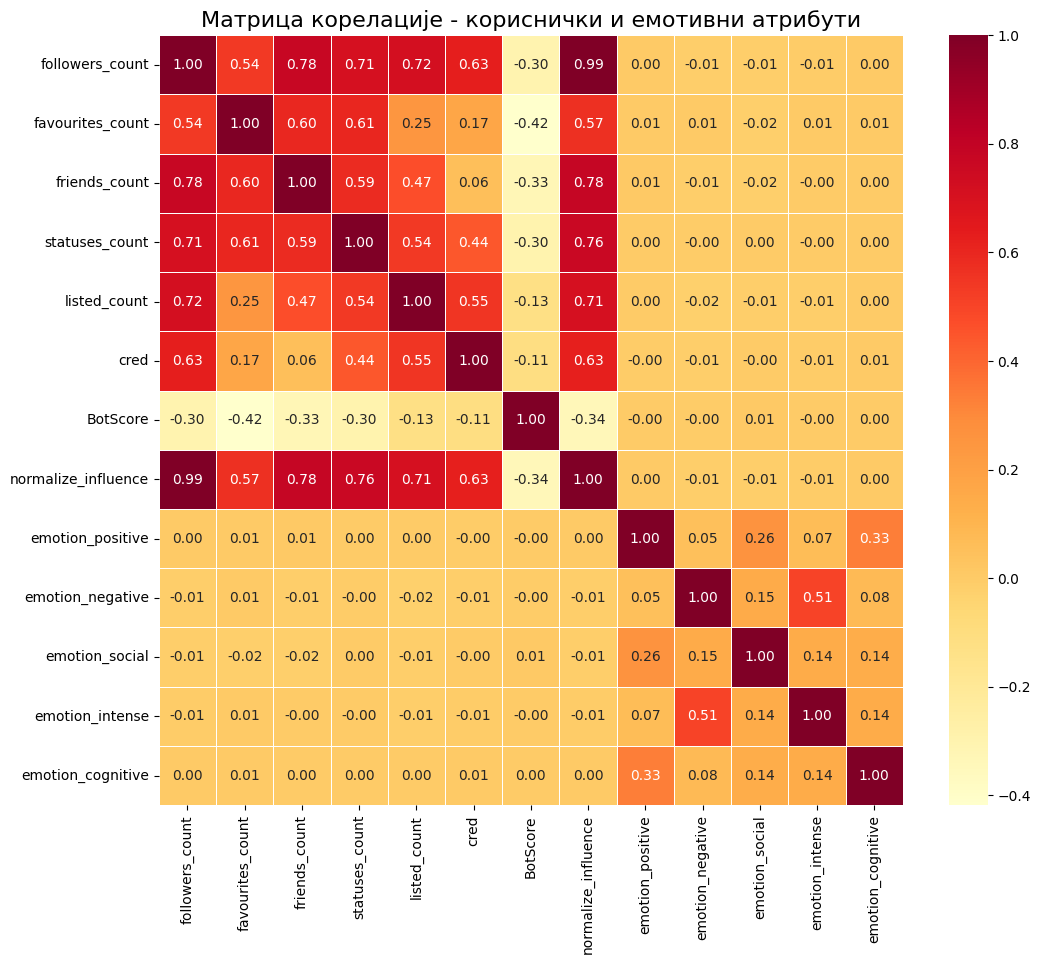

In [59]:
correlation_matrix = df_merged[features_cols_user_empath].corr()

plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='YlOrRd', fmt=".2f", linewidths=.5)
plt.title('Матрица корелације - кориснички и емотивни атрибути', fontsize=16)
plt.show()

In [60]:
features_cols_user_empath

['followers_count',
 'favourites_count',
 'friends_count',
 'statuses_count',
 'listed_count',
 'cred',
 'BotScore',
 'normalize_influence',
 'emotion_positive',
 'emotion_negative',
 'emotion_social',
 'emotion_intense',
 'emotion_cognitive']

In [61]:
x = df_merged[features_cols_user_empath]
y = df_merged['BinaryNumTarget']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=1) 


In [62]:
# Random Forest - User and Empath
rf = RandomForestClassifier(random_state=42)


param_grid = {
    'n_estimators': [100, 150],
    'max_depth': [10, 20, None],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2],
    'criterion': ['gini', 'entropy']
}


grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, 
                           cv=3, scoring='accuracy', verbose=1, n_jobs=-1)

grid_search.fit(x_train, y_train)
best_rf = grid_search.best_estimator_
y_pred = best_rf.predict(x_test)

print("Najbolji parametri:", grid_search.best_params_)
report = classification_report(y_test, y_pred, digits=3)
print(report)

Fitting 3 folds for each of 48 candidates, totalling 144 fits
Najbolji parametri: {'criterion': 'gini', 'max_depth': None, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 150}
              precision    recall  f1-score   support

         0.0      0.629     0.639     0.634     12990
         1.0      0.656     0.647     0.651     13849

    accuracy                          0.643     26839
   macro avg      0.643     0.643     0.643     26839
weighted avg      0.643     0.643     0.643     26839



In [63]:
#Decision Tree - User and Empath

clf = DecisionTreeClassifier()

param_grid = {
    'max_depth': [5, 10, 15, 20, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'criterion': ['gini', 'entropy']
}

grid_search = GridSearchCV(estimator=clf, param_grid=param_grid, 
                           cv=5, scoring='accuracy', verbose=1, n_jobs=-1)


grid_search.fit(x_train, y_train)
best_clf = grid_search.best_estimator_
y_pred = best_clf.predict(x_test)


print("Najbolji parametri:", grid_search.best_params_)
report = classification_report(y_test, y_pred, digits=3)
print(report)

Fitting 5 folds for each of 90 candidates, totalling 450 fits
Najbolji parametri: {'criterion': 'entropy', 'max_depth': 15, 'min_samples_leaf': 1, 'min_samples_split': 2}
              precision    recall  f1-score   support

         0.0      0.563     0.650     0.603     12990
         1.0      0.616     0.526     0.567     13849

    accuracy                          0.586     26839
   macro avg      0.589     0.588     0.585     26839
weighted avg      0.590     0.586     0.585     26839



In [64]:
# Naive Bayes -  User and Empath

nb = MultinomialNB()


param_grid = {
    'alpha': [0.01, 0.1, 0.5, 1.0, 2.0, 5.0],        
    'fit_prior': [True, False],                      
}

grid_search = GridSearchCV(estimator=nb, param_grid=param_grid, 
                           cv=5, scoring='accuracy', verbose=1, n_jobs=-1)

grid_search.fit(x_train, y_train)

best_nb = grid_search.best_estimator_
y_pred = best_nb.predict(x_test)

print("Najbolji parametri:", grid_search.best_params_)
report = classification_report(y_test, y_pred, digits=3)
print(report)

Fitting 5 folds for each of 12 candidates, totalling 60 fits
Najbolji parametri: {'alpha': 0.01, 'fit_prior': False}
              precision    recall  f1-score   support

         0.0      0.542     0.689     0.607     12990
         1.0      0.609     0.454     0.520     13849

    accuracy                          0.568     26839
   macro avg      0.576     0.572     0.564     26839
weighted avg      0.577     0.568     0.562     26839



In [65]:
# Logistic Regression - User and Empath

lr = LogisticRegression(max_iter=1000)  


param_grid = {
    'C': [0.01, 0.1, 1, 10],          
    'penalty': ['l1', 'l2'],            
    'class_weight': [None, 'balanced']    
}

grid_search = GridSearchCV(estimator=lr, param_grid=param_grid, 
                           cv=3, scoring='accuracy', verbose=1, n_jobs=-1)

grid_search.fit(x_train, y_train)


best_lr = grid_search.best_estimator_
y_pred = best_lr.predict(x_test)


print("Najbolji parametri:", grid_search.best_params_)
report = classification_report(y_test, y_pred, digits=3)
print(report)

Fitting 3 folds for each of 16 candidates, totalling 48 fits


C:\Users\Sara\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\model_selection\_validation.py:540: FitFailedWarning: 
24 fits failed out of a total of 48.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
24 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\Sara\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\model_selection\_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Sara\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-package

Najbolji parametri: {'C': 10, 'class_weight': 'balanced', 'penalty': 'l2'}
              precision    recall  f1-score   support

         0.0      0.550     0.647     0.594     12990
         1.0      0.603     0.503     0.549     13849

    accuracy                          0.573     26839
   macro avg      0.576     0.575     0.571     26839
weighted avg      0.577     0.573     0.571     26839



In [66]:
#KNeighbors - User and Empath


param_grid_knn = {
    'n_neighbors': [3, 5, 7],
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan']
}

grid_search_knn = GridSearchCV(KNeighborsClassifier(), param_grid_knn, cv=3, scoring='accuracy', n_jobs=-1)
grid_search_knn.fit(x_train, y_train)

print("Best parameters for KNN:", grid_search_knn.best_params_)

best_knn = grid_search_knn.best_estimator_
y_pred = best_knn.predict(x_test)
report = classification_report(y_test, y_pred, digits=3)
print(report)



Best parameters for KNN: {'metric': 'manhattan', 'n_neighbors': 7, 'weights': 'distance'}
              precision    recall  f1-score   support

         0.0      0.632     0.622     0.627     12990
         1.0      0.651     0.660     0.655     13849

    accuracy                          0.642     26839
   macro avg      0.641     0.641     0.641     26839
weighted avg      0.642     0.642     0.642     26839



In [67]:
#XGBoost - User and Empath

param_grid_xgb = {
    'learning_rate': [0.01, 0.1, 0.2],  
    'n_estimators': [100, 200],        
    'max_depth': [3, 5, 7],             
    'subsample': [0.8, 0.9, 1.0],        
    'colsample_bytree': [0.8, 0.9]       
}
grid_search_xgb = GridSearchCV(XGBClassifier(), param_grid_xgb, cv=3, scoring='accuracy', n_jobs=-1)
grid_search_xgb.fit(x_train, y_train)

print("Best parameters for XGBoost:", grid_search_xgb.best_params_)

best_xgb = grid_search_xgb.best_estimator_
y_pred = best_xgb.predict(x_test)

report = classification_report(y_test, y_pred, digits=3)
print(report)

Best parameters for XGBoost: {'colsample_bytree': 0.9, 'learning_rate': 0.2, 'max_depth': 7, 'n_estimators': 200, 'subsample': 0.9}
              precision    recall  f1-score   support

         0.0      0.611     0.631     0.621     12990
         1.0      0.643     0.623     0.633     13849

    accuracy                          0.627     26839
   macro avg      0.627     0.627     0.627     26839
weighted avg      0.627     0.627     0.627     26839



In [68]:
# SVM - User and Empath

param_grid = {
    'C': [0.1, 1, 10],
    'kernel': ['linear', 'rbf'],
    'gamma': ['scale'] 
}

svm = SVC()
grid = GridSearchCV(svm, param_grid, cv=2, n_jobs=-1, verbose=1, scoring='f1') 
grid.fit(x_train, y_train)

best_svm = grid.best_estimator_
y_pred = best_svm.predict(x_test)

print("Najbolji parametri:", grid.best_params_)
report = classification_report(y_test, y_pred, digits=3)
print(report)


Fitting 2 folds for each of 6 candidates, totalling 12 fits
Najbolji parametri: {'C': 1, 'gamma': 'scale', 'kernel': 'rbf'}
              precision    recall  f1-score   support

         0.0      0.552     0.690     0.613     12990
         1.0      0.620     0.474     0.537     13849

    accuracy                          0.579     26839
   macro avg      0.586     0.582     0.575     26839
weighted avg      0.587     0.579     0.574     26839



# Tweet + Empath

In [69]:
features_cols_tweet_empath = feature_cols_tweet + kolone

In [70]:
features_cols_tweet_empath

['Word count',
 'Max word length',
 'Min word length',
 'Average word length',
 'Present verbs',
 'Past verbs',
 'Adjectives',
 'Adverbs',
 'Pronouns',
 'Determiners',
 'Prepositions',
 'Digits',
 'emotion_positive',
 'emotion_negative',
 'emotion_social',
 'emotion_intense',
 'emotion_cognitive']

In [71]:
x = df_merged[features_cols_tweet_empath]
y = df_merged['BinaryNumTarget']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=1) 


In [72]:
# Random Forest - Tweet and Empath
rf = RandomForestClassifier(random_state=42)


param_grid = {
    'n_estimators': [100],                
    'max_depth': [10, None],               
    'min_samples_split': [2],              
    'min_samples_leaf': [1],              
    'criterion': ['gini']                 
}


grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, 
                           cv=3, scoring='accuracy', verbose=1, n_jobs=-1)

grid_search.fit(x_train, y_train)
best_rf = grid_search.best_estimator_
y_pred = best_rf.predict(x_test)

print("Najbolji parametri:", grid_search.best_params_)

report = classification_report(y_test, y_pred, digits=3)
print(report)


Fitting 3 folds for each of 2 candidates, totalling 6 fits
Najbolji parametri: {'criterion': 'gini', 'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}
              precision    recall  f1-score   support

         0.0      0.640     0.673     0.656     12990
         1.0      0.677     0.644     0.660     13849

    accuracy                          0.658     26839
   macro avg      0.658     0.658     0.658     26839
weighted avg      0.659     0.658     0.658     26839



In [73]:
#Decision Tree - Tweet and Empath

clf = DecisionTreeClassifier()

param_grid = {
    'max_depth': [5, 10, 15, 20, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'criterion': ['gini', 'entropy']
}

grid_search = GridSearchCV(estimator=clf, param_grid=param_grid, 
                           cv=5, scoring='accuracy', verbose=1, n_jobs=-1)


grid_search.fit(x_train, y_train)
best_clf = grid_search.best_estimator_
y_pred = best_clf.predict(x_test)


print("Najbolji parametri:", grid_search.best_params_)
report = classification_report(y_test, y_pred, digits=3)
print(report)




Fitting 5 folds for each of 90 candidates, totalling 450 fits
Najbolji parametri: {'criterion': 'gini', 'max_depth': 10, 'min_samples_leaf': 4, 'min_samples_split': 5}
              precision    recall  f1-score   support

         0.0      0.595     0.634     0.614     12990
         1.0      0.634     0.596     0.614     13849

    accuracy                          0.614     26839
   macro avg      0.615     0.615     0.614     26839
weighted avg      0.615     0.614     0.614     26839



In [74]:
# Naive Bayes -  Tweet and Empath

nb = MultinomialNB()


param_grid = {
    'alpha': [0.01, 0.1, 0.5, 1.0, 2.0, 5.0],        
    'fit_prior': [True, False],                      
}

grid_search = GridSearchCV(estimator=nb, param_grid=param_grid, 
                           cv=5, scoring='accuracy', verbose=1, n_jobs=-1)

grid_search.fit(x_train, y_train)

best_nb = grid_search.best_estimator_
y_pred = best_nb.predict(x_test)

print("Najbolji parametri:", grid_search.best_params_)

report = classification_report(y_test, y_pred, digits=3)
print(report)



Fitting 5 folds for each of 12 candidates, totalling 60 fits
Najbolji parametri: {'alpha': 0.01, 'fit_prior': True}
              precision    recall  f1-score   support

         0.0      0.561     0.577     0.569     12990
         1.0      0.592     0.577     0.584     13849

    accuracy                          0.577     26839
   macro avg      0.577     0.577     0.577     26839
weighted avg      0.577     0.577     0.577     26839



In [75]:
# Logistic Regression -Tweet and Empath

lr = LogisticRegression(max_iter=1000)  


param_grid = {
    'C': [0.01, 0.1, 1, 10],          
    'penalty': ['l1', 'l2'],            
    'class_weight': [None, 'balanced']    
}

grid_search = GridSearchCV(estimator=lr, param_grid=param_grid, 
                           cv=3, scoring='accuracy', verbose=1, n_jobs=-1)

grid_search.fit(x_train, y_train)


best_lr = grid_search.best_estimator_
y_pred = best_lr.predict(x_test)


print("Najbolji parametri:", grid_search.best_params_)
report = classification_report(y_test, y_pred, digits=3)
print(report)



Fitting 3 folds for each of 16 candidates, totalling 48 fits


C:\Users\Sara\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\model_selection\_validation.py:540: FitFailedWarning: 
24 fits failed out of a total of 48.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
24 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\Sara\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\model_selection\_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Sara\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-package

Najbolji parametri: {'C': 1, 'class_weight': None, 'penalty': 'l2'}
              precision    recall  f1-score   support

         0.0      0.579     0.527     0.552     12990
         1.0      0.591     0.641     0.615     13849

    accuracy                          0.586     26839
   macro avg      0.585     0.584     0.584     26839
weighted avg      0.585     0.586     0.585     26839



In [76]:
#KNeighbors - Tweet and Empath


param_grid_knn = {
    'n_neighbors': [3, 5, 7],
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan']
}

grid_search_knn = GridSearchCV(KNeighborsClassifier(), param_grid_knn, cv=3, scoring='accuracy', n_jobs=-1)
grid_search_knn.fit(x_train, y_train)

print("Best parameters for KNN:", grid_search_knn.best_params_)

best_knn = grid_search_knn.best_estimator_
y_pred = best_knn.predict(x_test)

report = classification_report(y_test, y_pred, digits=3)
print(report)



Best parameters for KNN: {'metric': 'manhattan', 'n_neighbors': 7, 'weights': 'distance'}
              precision    recall  f1-score   support

         0.0      0.593     0.607     0.600     12990
         1.0      0.623     0.609     0.616     13849

    accuracy                          0.608     26839
   macro avg      0.608     0.608     0.608     26839
weighted avg      0.608     0.608     0.608     26839



In [77]:
#XGBoost - Tweet and Empath

param_grid_xgb = {
    'learning_rate': [0.01, 0.1, 0.2],  
    'n_estimators': [100, 200],        
    'max_depth': [3, 5, 7],             
    'subsample': [0.8, 0.9, 1.0],        
    'colsample_bytree': [0.8, 0.9]       
}
grid_search_xgb = GridSearchCV(XGBClassifier(), param_grid_xgb, cv=3, scoring='accuracy', n_jobs=-1)
grid_search_xgb.fit(x_train, y_train)

print("Best parameters for XGBoost:", grid_search_xgb.best_params_)

best_xgb = grid_search_xgb.best_estimator_
y_pred= best_xgb.predict(x_test)

report = classification_report(y_test, y_pred, digits=3)
print(report)


Best parameters for XGBoost: {'colsample_bytree': 0.8, 'learning_rate': 0.2, 'max_depth': 7, 'n_estimators': 200, 'subsample': 0.9}
              precision    recall  f1-score   support

         0.0      0.653     0.662     0.658     12990
         1.0      0.679     0.670     0.675     13849

    accuracy                          0.666     26839
   macro avg      0.666     0.666     0.666     26839
weighted avg      0.667     0.666     0.666     26839



In [78]:
# SVM - Tweet and Empath

svm_clf = SVC()  
svm_clf.fit(x_train, y_train)  

y_pred = svm_clf.predict(x_test)

report = classification_report(y_test, y_pred, digits=3)
print(report)

              precision    recall  f1-score   support

         0.0      0.581     0.578     0.579     12990
         1.0      0.606     0.609     0.607     13849

    accuracy                          0.594     26839
   macro avg      0.593     0.593     0.593     26839
weighted avg      0.594     0.594     0.594     26839



# User + Tweet + Empath 

In [79]:
features_full = feature_cols_tweet+feature_cols_users+kolone

In [80]:
features_full

['Word count',
 'Max word length',
 'Min word length',
 'Average word length',
 'Present verbs',
 'Past verbs',
 'Adjectives',
 'Adverbs',
 'Pronouns',
 'Determiners',
 'Prepositions',
 'Digits',
 'followers_count',
 'favourites_count',
 'friends_count',
 'statuses_count',
 'listed_count',
 'cred',
 'BotScore',
 'normalize_influence',
 'emotion_positive',
 'emotion_negative',
 'emotion_social',
 'emotion_intense',
 'emotion_cognitive']

In [81]:
df_merged['followers_count'].max()

18.687664430135666

In [82]:
x = df_merged[features_full]
y = df_merged['BinaryNumTarget']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=1) 


In [83]:
# Random Forest - Full
rf = RandomForestClassifier(random_state=42)


param_grid = {
    'n_estimators': [100],                
    'max_depth': [10, None],               
    'min_samples_split': [2],              
    'min_samples_leaf': [1],              
    'criterion': ['gini']                 
}


grid_search_rf = GridSearchCV(estimator=rf, param_grid=param_grid, 
                           cv=3, scoring='accuracy', verbose=1, n_jobs=-1)

grid_search_rf.fit(x_train, y_train)
best_rf = grid_search_rf.best_estimator_
y_pred = best_rf.predict(x_test)

print("Najbolji parametri:", grid_search_rf.best_params_)

report = classification_report(y_test, y_pred, digits=3)
print(report)



Fitting 3 folds for each of 2 candidates, totalling 6 fits
Najbolji parametri: {'criterion': 'gini', 'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}
              precision    recall  f1-score   support

         0.0      0.656     0.687     0.671     12990
         1.0      0.693     0.661     0.677     13849

    accuracy                          0.674     26839
   macro avg      0.674     0.674     0.674     26839
weighted avg      0.675     0.674     0.674     26839



In [84]:
#Decision Tree - Full

clf = DecisionTreeClassifier()

param_grid = {
    'max_depth': [5, 10, 15, 20, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'criterion': ['gini', 'entropy']
}

grid_search_clf = GridSearchCV(estimator=clf, param_grid=param_grid, 
                           cv=5, scoring='accuracy', verbose=1, n_jobs=-1)


grid_search_clf.fit(x_train, y_train)
best_clf = grid_search_clf.best_estimator_
y_pred = best_clf.predict(x_test)


print("Najbolji parametri:", grid_search_clf.best_params_)

report = classification_report(y_test, y_pred, digits=3)
print(report)



Fitting 5 folds for each of 90 candidates, totalling 450 fits
Najbolji parametri: {'criterion': 'entropy', 'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 5}
              precision    recall  f1-score   support

         0.0      0.589     0.671     0.627     12990
         1.0      0.645     0.561     0.600     13849

    accuracy                          0.614     26839
   macro avg      0.617     0.616     0.614     26839
weighted avg      0.618     0.614     0.613     26839



In [85]:
# Naive Bayes -  Full

nb = MultinomialNB()


param_grid = {
    'alpha': [0.01, 0.1, 0.5, 1.0, 2.0, 5.0],        
    'fit_prior': [True, False],                      
}

grid_search_nb = GridSearchCV(estimator=nb, param_grid=param_grid, 
                           cv=5, scoring='accuracy', verbose=1, n_jobs=-1)

grid_search_nb.fit(x_train, y_train)

best_nb = grid_search_nb.best_estimator_
y_pred = best_nb.predict(x_test)

print("Najbolji parametri:", grid_search_nb.best_params_)

report = classification_report(y_test, y_pred, digits=3)
print(report)



Fitting 5 folds for each of 12 candidates, totalling 60 fits
Najbolji parametri: {'alpha': 2.0, 'fit_prior': True}
              precision    recall  f1-score   support

         0.0      0.558     0.606     0.581     12990
         1.0      0.598     0.549     0.572     13849

    accuracy                          0.577     26839
   macro avg      0.578     0.578     0.577     26839
weighted avg      0.578     0.577     0.576     26839



In [86]:
# Logistic Regression - Full

lr = LogisticRegression(max_iter=1000)  


param_grid = {
    'C': [0.01, 0.1, 1, 10],          
    'penalty': ['l1', 'l2'],            
    'class_weight': [None, 'balanced']    
}

grid_search_lr = GridSearchCV(estimator=lr, param_grid=param_grid, 
                           cv=3, scoring='accuracy', verbose=1, n_jobs=-1)

grid_search_lr.fit(x_train, y_train)


best_lr = grid_search_lr.best_estimator_
y_pred = best_lr.predict(x_test)


print("Najbolji parametri:", grid_search_lr.best_params_)

report = classification_report(y_test, y_pred, digits=3)
print(report)


Fitting 3 folds for each of 16 candidates, totalling 48 fits


C:\Users\Sara\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\model_selection\_validation.py:540: FitFailedWarning: 
24 fits failed out of a total of 48.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
24 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\Sara\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\model_selection\_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Sara\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-package

Najbolji parametri: {'C': 1, 'class_weight': 'balanced', 'penalty': 'l2'}
              precision    recall  f1-score   support

         0.0      0.584     0.641     0.611     12990
         1.0      0.629     0.572     0.599     13849

    accuracy                          0.605     26839
   macro avg      0.607     0.606     0.605     26839
weighted avg      0.607     0.605     0.605     26839



In [87]:
#KNeighbors - Full


param_grid_knn = {
    'n_neighbors': [3, 5, 7],
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan']
}

grid_search_knn = GridSearchCV(KNeighborsClassifier(), param_grid_knn, cv=3, scoring='accuracy', n_jobs=-1)
grid_search_knn.fit(x_train, y_train)

print("Best parameters for KNN:", grid_search_knn.best_params_)

best_knn = grid_search_knn.best_estimator_
y_pred = best_knn.predict(x_test)


report = classification_report(y_test, y_pred, digits=3)
print(report)



Best parameters for KNN: {'metric': 'manhattan', 'n_neighbors': 7, 'weights': 'distance'}
              precision    recall  f1-score   support

         0.0      0.611     0.645     0.628     12990
         1.0      0.649     0.615     0.632     13849

    accuracy                          0.630     26839
   macro avg      0.630     0.630     0.630     26839
weighted avg      0.631     0.630     0.630     26839



In [88]:
#XGBoost - Full

param_grid_xgb = {
    'learning_rate': [0.01, 0.1, 0.2],  
    'n_estimators': [100, 200],        
    'max_depth': [3, 5, 7],             
    'subsample': [0.8, 0.9, 1.0],        
    'colsample_bytree': [0.8, 0.9]       
}
grid_search_xgb = GridSearchCV(XGBClassifier(), param_grid_xgb, cv=3, scoring='accuracy', n_jobs=-1)
grid_search_xgb.fit(x_train, y_train)

print("Best parameters for XGBoost:", grid_search_xgb.best_params_)

best_xgb = grid_search_xgb.best_estimator_
y_pred = best_xgb.predict(x_test)

report = classification_report(y_test, y_pred, digits=3)
print(report)


Best parameters for XGBoost: {'colsample_bytree': 0.9, 'learning_rate': 0.2, 'max_depth': 7, 'n_estimators': 200, 'subsample': 1.0}
              precision    recall  f1-score   support

         0.0      0.671     0.688     0.679     12990
         1.0      0.700     0.684     0.692     13849

    accuracy                          0.686     26839
   macro avg      0.686     0.686     0.686     26839
weighted avg      0.686     0.686     0.686     26839



In [89]:
# SVM - Full

svm_clf = SVC()  
svm_clf.fit(x_train, y_train)  

y_pred = svm_clf.predict(x_test)

report = classification_report(y_test, y_pred, digits=3)
print(report)



              precision    recall  f1-score   support

         0.0      0.591     0.682     0.633     12990
         1.0      0.651     0.557     0.601     13849

    accuracy                          0.617     26839
   macro avg      0.621     0.619     0.617     26839
weighted avg      0.622     0.617     0.616     26839



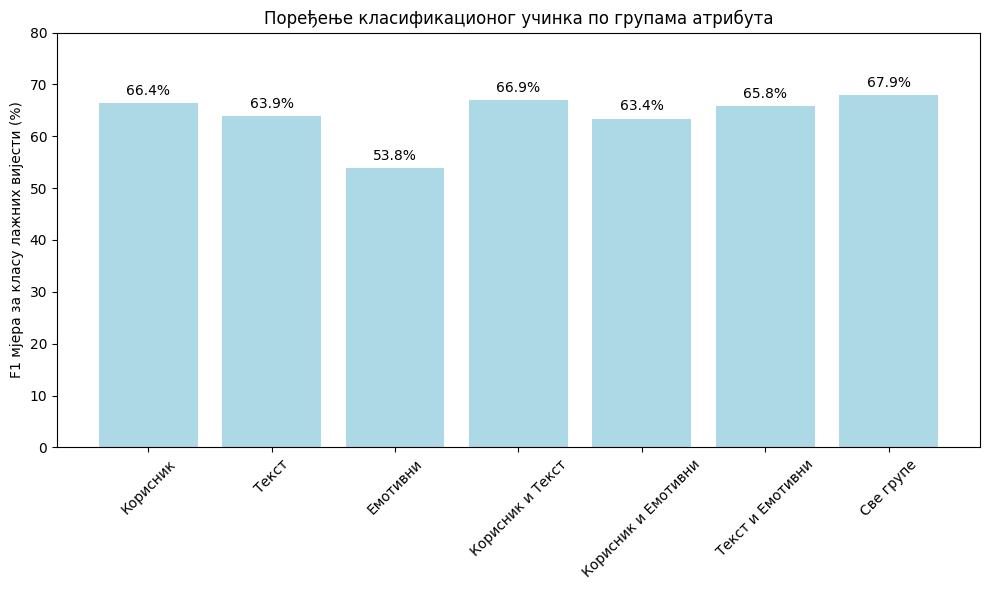

In [ ]:
import matplotlib.pyplot as plt

results = {
    "Корисник":     0.664,
    "Текст":        0.639,
    "Емотивни":     0.538,
    "Корисник и Текст":        0.669,
    "Корисник и Емотивни":     0.634,
    "Текст и Емотивни":        0.658,
    "Све групе":               0.679
}


values = [v * 100 for v in results.values()]
labels = list(results.keys())

plt.figure(figsize=(10, 6))
bars = plt.bar(labels, values, color='lightblue')
plt.ylabel("F1 мјера за класу лажних вијести (%)")
plt.title("Поређење класификационог учинка по групама атрибута")
plt.ylim(0, 80)
plt.xticks(rotation=45)

for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, height + 1, f"{height:.1f}%", ha='center', va='bottom')

plt.tight_layout()
plt.show()


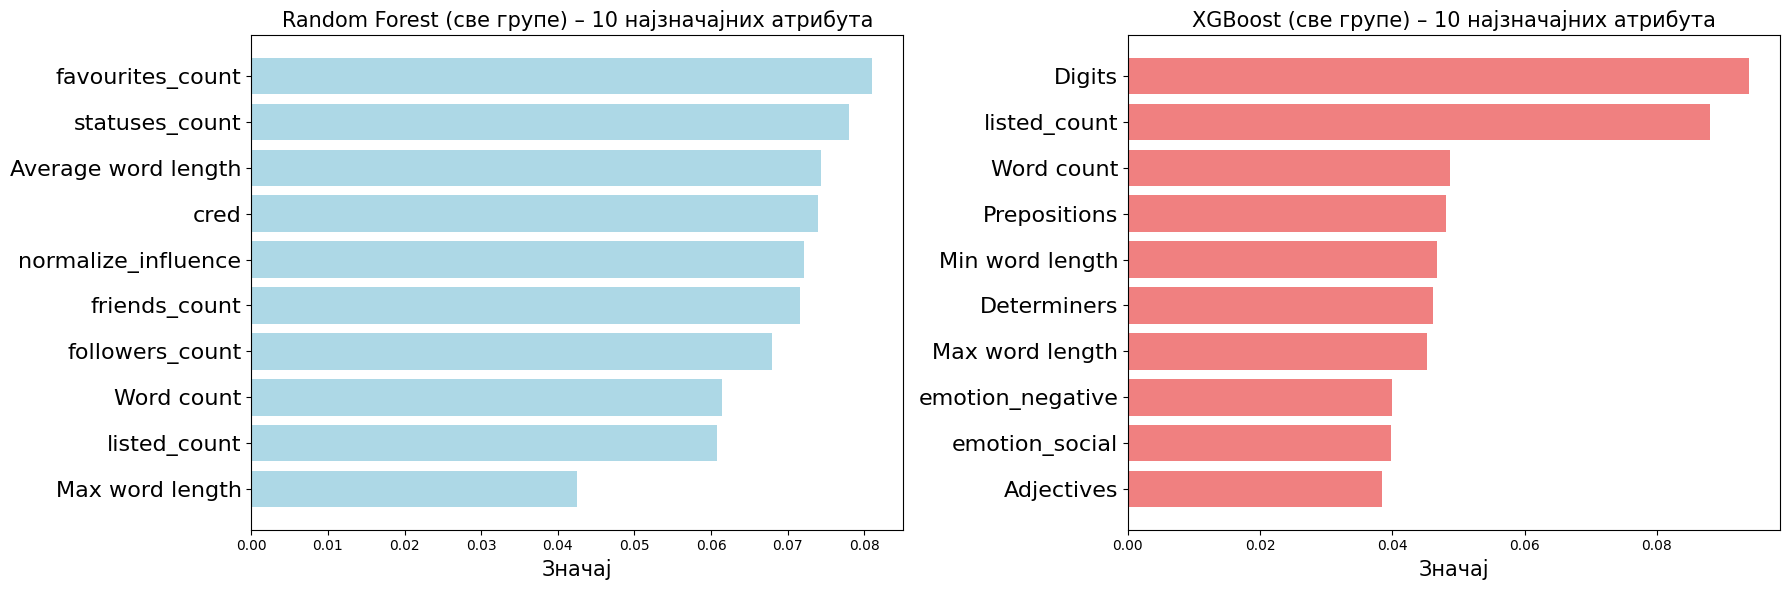

In [17]:
import matplotlib.pyplot as plt

best_model_rf = grid_search_rf.best_estimator_
importances_rf = best_model_rf.feature_importances_
feature_names_rf = x_train.columns

features_sorted_rf = sorted(zip(importances_rf, feature_names_rf), reverse=True)
top_10_rf = features_sorted_rf[:10]
importances_rf_sorted, names_rf_sorted = zip(*top_10_rf)
best_model_xgb = grid_search_xgb.best_estimator_
importances_xgb = best_model_xgb.feature_importances_
feature_names_xgb = x_train.columns

features_sorted_xgb = sorted(zip(importances_xgb, feature_names_xgb), reverse=True)
top_10_xgb = features_sorted_xgb[:10]
importances_xgb_sorted, names_xgb_sorted = zip(*top_10_xgb)

fig, axes = plt.subplots(1, 2, figsize=(18, 6), sharey=False)

# Random Forest график
axes[0].barh(names_rf_sorted, importances_rf_sorted, color='lightblue')
axes[0].set_title("Random Forest (све групе) – 10 најзначајних атрибута", fontsize=15)
axes[0].set_xlabel("Значај", fontsize=15)
axes[0].invert_yaxis()
axes[0].tick_params(axis='y', labelsize=16)

# XGBoost график
axes[1].barh(names_xgb_sorted, importances_xgb_sorted, color='lightcoral')
axes[1].set_title("XGBoost (све групе) – 10 најзначајних атрибута", fontsize=15)
axes[1].set_xlabel("Значај", fontsize=15)
axes[1].invert_yaxis()
axes[1].tick_params(axis='y', labelsize=16)


plt.tight_layout()
plt.show()


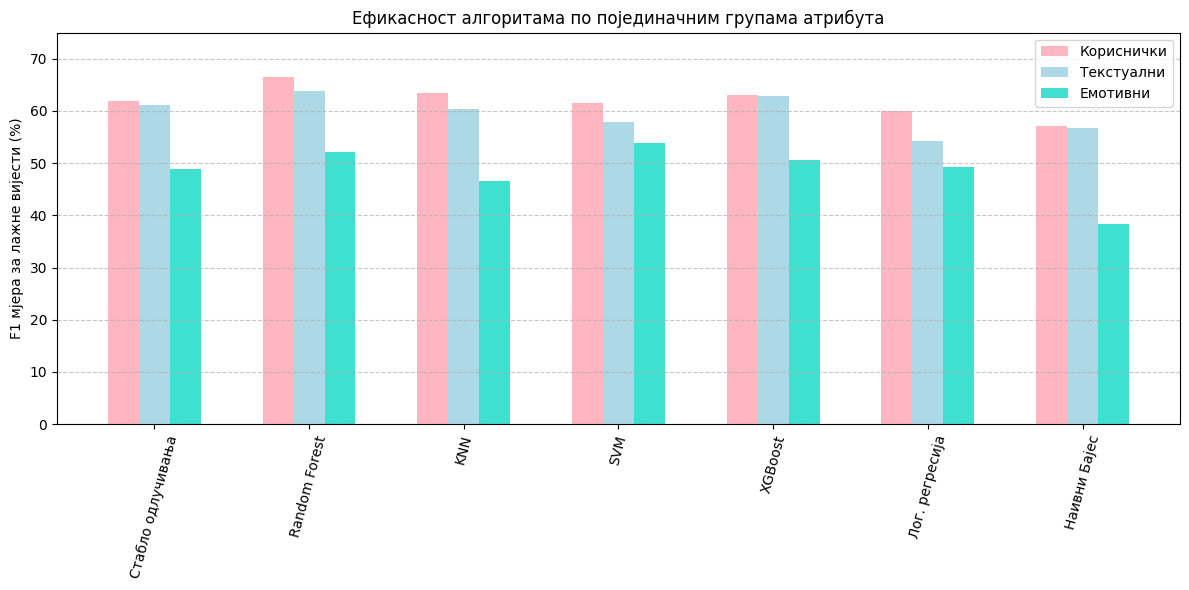

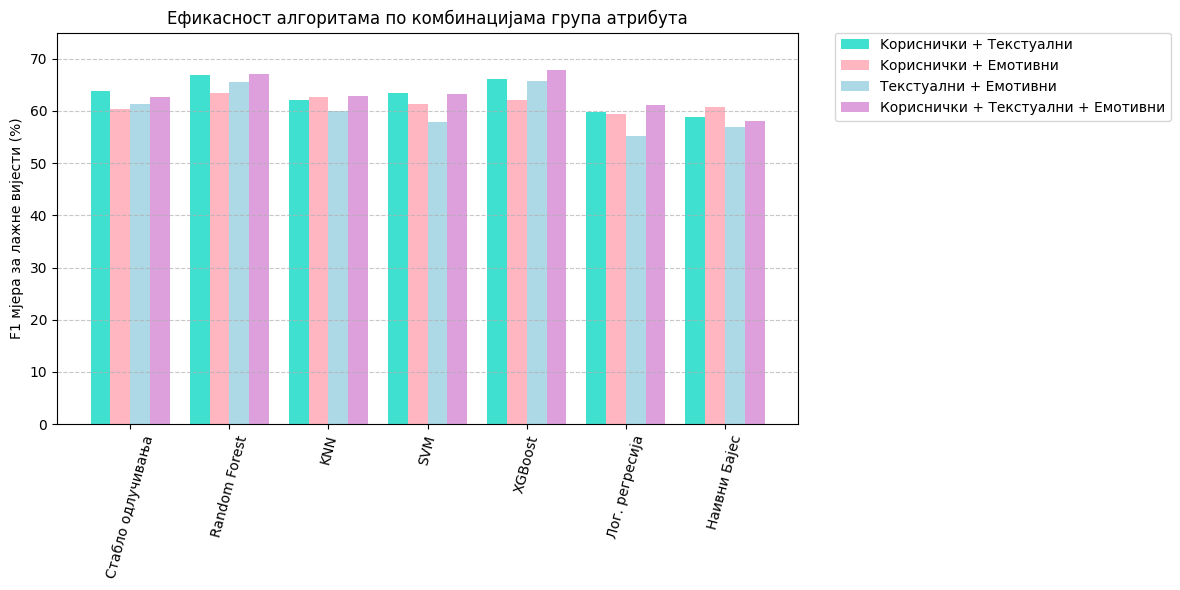

In [90]:


algoritmi = ['Стабло одлучивања','Random Forest','KNN', 'SVM', 'XGBoost', 'Лог. регресија', 'Наивни Бајес']
x = np.arange(len(algoritmi))
width = 0.2
f1_user = np.array([0.618, 0.664, 0.635, 0.616, 0.630, 0.600, 0.572]) * 100
f1_text = np.array([0.612, 0.639, 0.604, 0.579, 0.628, 0.543, 0.568]) * 100
f1_empath = np.array([0.489, 0.521, 0.466, 0.538, 0.505, 0.493, 0.384]) * 100

f1_u_t = np.array([0.638, 0.669, 0.620, 0.634, 0.662, 0.597, 0.588]) * 100
f1_u_e = np.array([0.603, 0.634, 0.627, 0.613, 0.621, 0.594, 0.607]) * 100
f1_t_e = np.array([0.614, 0.656, 0.600, 0.579, 0.658, 0.552, 0.569]) * 100
f1_u_t_e = np.array([0.627, 0.671, 0.628, 0.633, 0.679, 0.611, 0.581]) * 100


plt.figure(figsize=(12, 6))
bars1 = plt.bar(x - width, f1_user, width, label='Кориснички', color='lightpink')
bars2 = plt.bar(x, f1_text, width, label='Текстуални', color='lightblue')
bars3 = plt.bar(x + width, f1_empath, width, label='Емотивни', color='turquoise')

plt.xticks(x, algoritmi, rotation=75)
plt.ylim(0, 75)
plt.ylabel('F1 мјера за лажне вијести (%)')
plt.title('Ефикасност алгоритама по појединачним групама атрибута')
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()

plt.show()


plt.figure(figsize=(12, 6))
bars1 = plt.bar(x - 1.5*width, f1_u_t, width, label='Kориснички + Текстуални', color='turquoise')
bars2 = plt.bar(x - 0.5*width, f1_u_e, width, label='Kориснички + Емотивни', color='lightpink')
bars3 = plt.bar(x + 0.5*width, f1_t_e, width, label='Текстуални + Емотивни', color='lightblue')
bars4 = plt.bar(x + 1.5*width, f1_u_t_e, width, label='Кориснички + Текстуални + Емотивни', color='plum')

plt.xticks(x, algoritmi, rotation=75)
plt.ylim(0, 75)
plt.ylabel('F1 мјера за лажне вијести (%)')
plt.title('Ефикасност алгоритама по комбинацијама група атрибута')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()
